<a href="https://colab.research.google.com/github/michaelryanka/ASG-PYTN-H8-Batch-062/blob/main/PYTN_Assgn_1_Batch_062_Muhammad_Michael_Ryanka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt




In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


In [ ]:
#Read 100.000 Data dari Google Sheet, untuk Google Sheet nya sudah di public sehingga bisa di akses siapa saja
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())
worksheet = gc.open_by_key('1le78wJ9S4VNHt2GXX-s0c7qZNWqOauADP3ZOCcqmCmo').sheet1
rows = worksheet.get_all_values()

import pandas as pd
df_london = pd.DataFrame.from_records(rows[1:],columns=rows[0])
print(df_london)

       lsoa_code     borough               major_category  ... value  year month
0      E01001116     Croydon                     Burglary  ...     0  2016    11
1      E01001646   Greenwich  Violence Against the Person  ...     0  2016    11
2      E01000677     Bromley  Violence Against the Person  ...     0  2015     5
3      E01003774   Redbridge                     Burglary  ...     0  2016     3
4      E01004563  Wandsworth                      Robbery  ...     0  2008     6
...          ...         ...                          ...  ...   ...   ...   ...
99995  E01003173     Lambeth           Theft and Handling  ...     0  2013     9
99996  E01004526  Wandsworth              Criminal Damage  ...     1  2008    12
99997  E01003611      Newham           Theft and Handling  ...     0  2011     3
99998  E01003666   Redbridge             Fraud or Forgery  ...     0  2012     1
99999  E01000400      Bexley                     Burglary  ...     0  2008     7

[100000 rows x 7 columns]


In [ ]:
df_london.info() #terlihat value, year dan momth tipe data nya string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   lsoa_code       100000 non-null  object
 1   borough         100000 non-null  object
 2   major_category  100000 non-null  object
 3   minor_category  100000 non-null  object
 4   value           100000 non-null  object
 5   year            100000 non-null  object
 6   month           100000 non-null  object
dtypes: object(7)
memory usage: 5.3+ MB


In [ ]:
#mengubah tipe data nya menjadi integer sesuai informasi yang ada pada di kaggle
df_london["value"]=df_london["value"].astype(int)
df_london["year"]=df_london["year"].astype(int)
df_london["month"]=df_london["month"].astype(int)

df_london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   lsoa_code       100000 non-null  object
 1   borough         100000 non-null  object
 2   major_category  100000 non-null  object
 3   minor_category  100000 non-null  object
 4   value           100000 non-null  int64 
 5   year            100000 non-null  int64 
 6   month           100000 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 5.3+ MB


In [ ]:
df_london.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [ ]:
df_london.isnull().sum().sum() #Mengecek data apakah ada yang Missing Values

0

In [ ]:
df_london.isnull().sum() #Mengecek data apakah ada yang Missing Values

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [ ]:
df_london.drop(['lsoa_code'], axis=1, inplace=True) #Menghapus kolom lsoa_code karena tidak terlalu diperlukan
df_london

,borough,major_category,minor_category,value,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...
99995,Lambeth,Theft and Handling,Other Theft Person,0,2013,9
99996,Wandsworth,Criminal Damage,Other Criminal Damage,1,2008,12
99997,Newham,Theft and Handling,Theft From Shops,0,2011,3
99998,Redbridge,Fraud or Forgery,Counted per Victim,0,2012,1


In [ ]:
df_london.sort_values(['year'],  ascending=True, axis=0, inplace=True) #contoh penggunaan sort, berikut sorting per tahun
df_london

,borough,major_category,minor_category,value,year,month
99999,Bexley,Burglary,Burglary in a Dwelling,0,2008,7
77541,Haringey,Theft and Handling,Handling Stolen Goods,0,2008,2
21802,Waltham Forest,Burglary,Burglary in a Dwelling,0,2008,2
9858,Islington,Other Notifiable Offences,Other Notifiable,0,2008,7
21801,Harrow,Violence Against the Person,Harassment,3,2008,8
...,...,...,...,...,...,...
78125,Greenwich,Other Notifiable Offences,Going Equipped,0,2016,12
40306,Greenwich,Theft and Handling,Motor Vehicle Interference & Tampering,0,2016,10
9648,Hounslow,Criminal Damage,Criminal Damage To Other Building,0,2016,12
9639,Enfield,Criminal Damage,Criminal Damage To Other Building,0,2016,7


## **Data Visualization**

In [ ]:
#melihat jumlah value major crime ada di london
df_maj_crime = df_london.groupby(['major_category']).sum()
df_maj_crime.drop(columns={"month","year"}, inplace=True)
df_maj_crime

,value
major_category,
Burglary,5764
Criminal Damage,4582
Drugs,3667
Fraud or Forgery,34
Other Notifiable Offences,797
Robbery,1907
Sexual Offences,9
Theft and Handling,19433
Violence Against the Person,11528


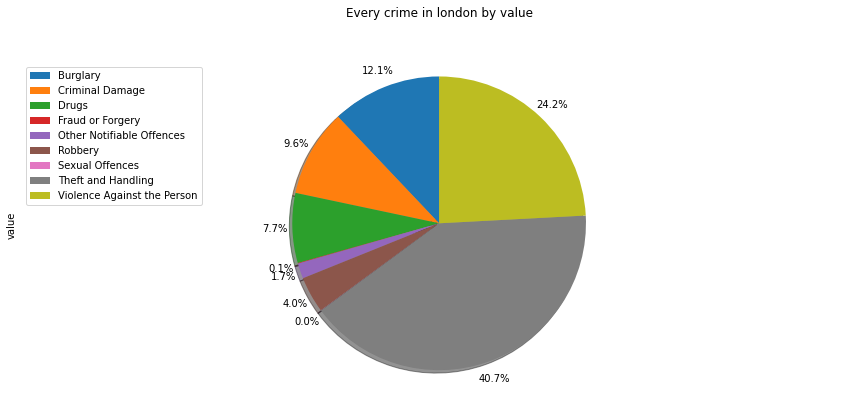

Diketahui dari hasil visualisasi, "Theft and Handling" adalah crime yang terbanyak berdasarkan kategori major di setiap wilayah London


In [ ]:
#Visualisasi Data major crime yang ada di london menggunakan pie chart
df_maj_crime['value'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,        
                            pctdistance=1.12,    
                            
                            )


plt.title('Every crime in london by value', y=1.12) 
plt.axis('equal') 
plt.legend(labels=df_maj_crime.index, loc='upper left') 
plt.show()

print(f'Diketahui dari hasil visualisasi, "Theft and Handling" adalah crime yang terbanyak berdasarkan kategori major di setiap wilayah London')

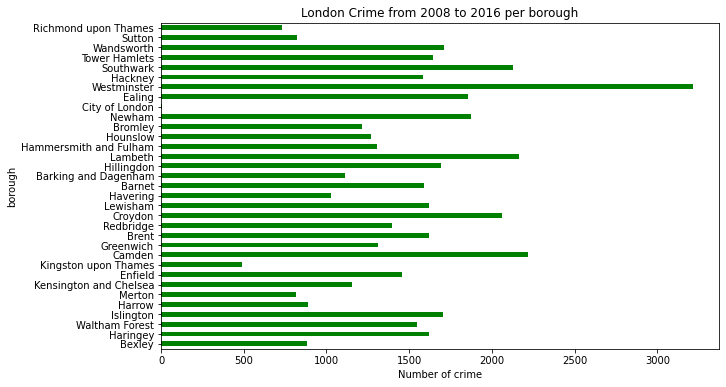

Diketahui dari hasil visualisasi, terlihat bahwa wilayah Westminster memiliki jumlah crime yang terbanyak


In [ ]:
#Visualisasi Bar Chart
#berapa jumlah crime per wilayah dan wilayah mana yang memiliki crime terbanyak?
borough_total = df_london.groupby("borough", sort=False)["value"].sum()

borough_total.plot(kind='barh', figsize=(10, 6),color='green')
plt.xlabel('Number of crime') 
plt.ylabel('borough') 
plt.title('London Crime from 2008 to 2016 per borough') 
plt.show()

print(f'Diketahui dari hasil visualisasi, terlihat bahwa wilayah Westminster memiliki jumlah crime yang terbanyak')

In [ ]:
#Visualisasi trend crime menggunakan Line Plot dan Area Plot pada 5 wilayah yang ada di london
df_perborough = df_london.groupby(['year','borough'])['value'].sum()
df_perborough = df_perborough.reset_index() 
df_perborough



,year,borough,value
0,2008,Barking and Dagenham,137
1,2008,Barnet,205
2,2008,Bexley,108
3,2008,Brent,156
4,2008,Bromley,185
...,...,...,...
292,2016,Sutton,113
293,2016,Tower Hamlets,211
294,2016,Waltham Forest,151
295,2016,Wandsworth,218


In [ ]:
#mengubah bentuk data frame nya agar bisa menggunakan visualisasi trend line dan area
df_y = df_perborough[df_perborough['year'] == 2008]
df_y = df_y.set_index('borough')
df_y = df_y.drop('year', axis=1)
df_y.rename(columns= {'value':2008}, inplace=True)
df_perborough_byyear = df_y

years = range(2009,2017)
for y in years:
    df_y = df_perborough [df_perborough['year'] == y]
    df_y = df_y.set_index('borough')
    df_y = df_y.drop('year', axis=1)
    df_y.rename(columns={'value':y}, inplace=True)

    df_perborough_byyear = pd.concat([df_perborough_byyear, df_y], axis=1, join="inner")


df_top5 = df_perborough_byyear.head() #mengambil 5 wilayah london bagian teratas bedasarkan alfabet wilayah
df_top5

,2008,2009,2010,2011,2012,2013,2014,2015,2016
borough,,,,,,,,,
Barking and Dagenham,137,114,118,106,113,112,120,174,115
Barnet,205,129,155,235,169,175,173,173,175
Bexley,108,109,115,81,92,95,91,81,108
Brent,156,177,156,243,184,172,167,180,183
Bromley,185,175,129,118,134,80,151,114,126


In [ ]:
#membuat transpose data nya
df_top5 = df_top5.T
df_top5

borough,Barking and Dagenham,Barnet,Bexley,Brent,Bromley
2008,137,205,108,156,185
2009,114,129,109,177,175
2010,118,155,115,156,129
2011,106,235,81,243,118
2012,113,169,92,184,134
2013,112,175,95,172,80
2014,120,173,91,167,151
2015,174,173,81,180,114
2016,115,175,108,183,126


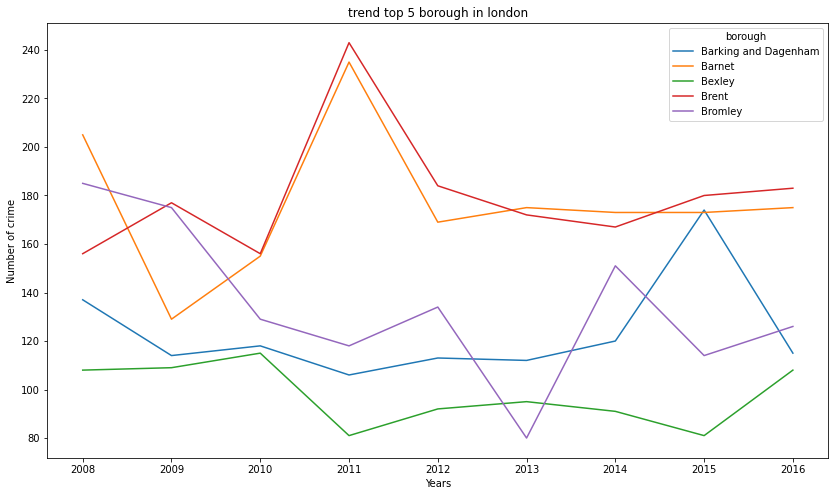



Diketahui dari hasil visualisasi line chart, terlihat bahwa dari 5 wilayah di london: 
-wilayah brent dan barnet memiliki number of crime terbanyak ada di tahun 2011
-wilayah bromley memiliki number of crime terbanyak ada di tahun 2008
-wilayah bexley memiliki number of crime terbanyak ada di tahun 2010
-wilayah barking and dangenham memiliki number of crime terbanyak ada di tahun 2015




In [ ]:
#membuat Line Plots
df_top5.plot(kind='line', figsize=(14, 8))

plt.title('trend top 5 borough in london')
plt.ylabel('Number of crime')
plt.xlabel('Years')

plt.show()

print(f"""

Diketahui dari hasil visualisasi line chart, terlihat bahwa dari 5 wilayah di london: 
-wilayah brent dan barnet memiliki number of crime terbanyak ada di tahun 2011
-wilayah bromley memiliki number of crime terbanyak ada di tahun 2008
-wilayah bexley memiliki number of crime terbanyak ada di tahun 2010
-wilayah barking and dangenham memiliki number of crime terbanyak ada di tahun 2015

""")

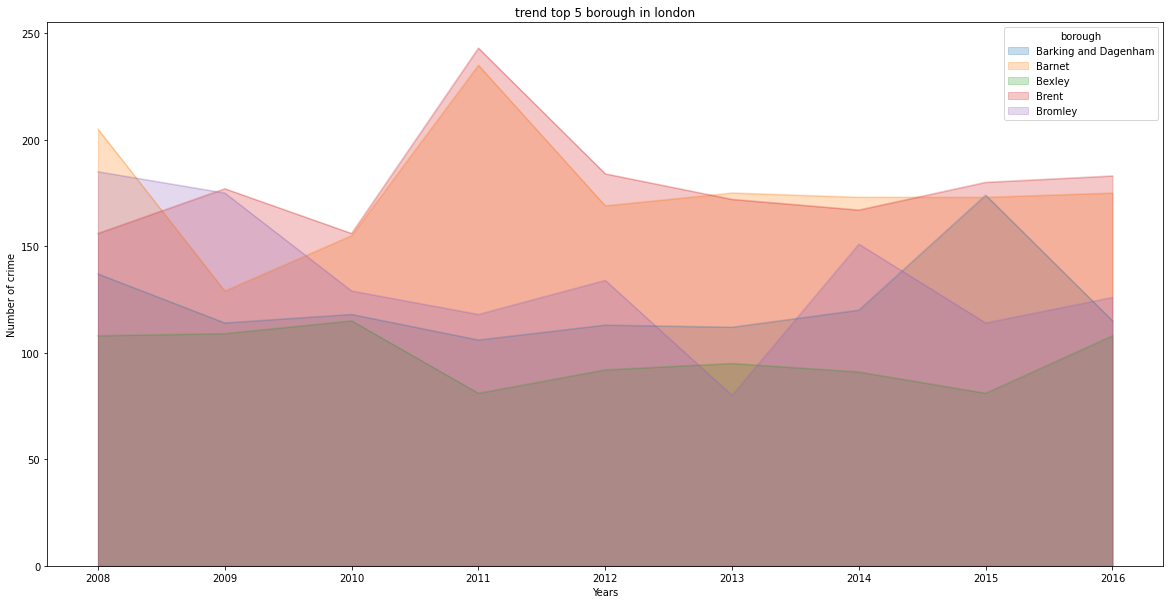



Diketahui dari hasil visualisasi area chart, terlihat bahwa dari 5 wilayah di london: 
-wilayah brent dan barnet memiliki number of crime terbanyak ada di tahun 2011
-wilayah bromley memiliki number of crime terbanyak ada di tahun 2008
-wilayah bexley memiliki number of crime terbanyak ada di tahun 2010
-wilayah barking and dangenham memiliki number of crime terbanyak ada di tahun 2015




In [ ]:
#membuat Area Plots
df_top5.plot(kind='area', 
             alpha=0.25, 
             stacked=False,
             figsize=(20, 10))

plt.title('trend top 5 borough in london')
plt.ylabel('Number of crime')
plt.xlabel('Years')

plt.show()

print(f"""

Diketahui dari hasil visualisasi area chart, terlihat bahwa dari 5 wilayah di london: 
-wilayah brent dan barnet memiliki number of crime terbanyak ada di tahun 2011
-wilayah bromley memiliki number of crime terbanyak ada di tahun 2008
-wilayah bexley memiliki number of crime terbanyak ada di tahun 2010
-wilayah barking and dangenham memiliki number of crime terbanyak ada di tahun 2015

""")

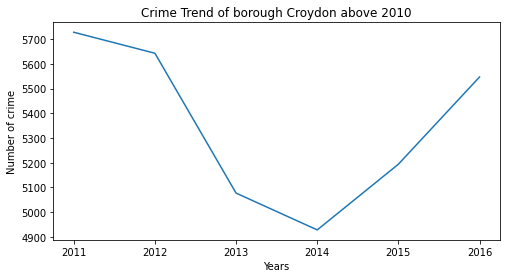

Diketahui dari hasil visualisasi, tahun 2011 adalah tahun yang memiliki number crime yang terbanyak di wilayah croydon


In [ ]:
#Visualisasi Line
#Pada tahun berapa crime terbanyanyak yang terjadi di wilayah london diatas tahun 2010?

df_bor_2010= df_london[(['borough'])&(df_london["year"]>2010)].groupby("year")["value"].sum()
df_bor_2010.plot(kind='line', figsize=(8, 4))

plt.title('Crime Trend of borough Croydon above 2010')
plt.ylabel('Number of crime')
plt.xlabel('Years')

plt.show()
print(f'Diketahui dari hasil visualisasi, tahun 2011 adalah tahun yang memiliki number crime yang terbanyak di wilayah croydon')

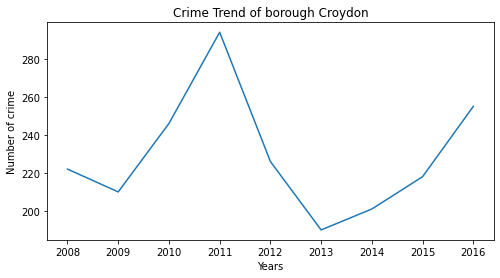

Diketahui dari hasil visualisasi, tahun 2011 adalah tahun yang memilik crime yang terbanyak di wilayah croydon


In [ ]:
#Visualisasi Line
#Pada tahun berapa crime terbanyanyak yang terjadi di wilayah croydon?

df_croydon = df_london[(df_london["borough"] == "Croydon")&(["year"])].groupby("year")["value"].sum()
df_croydon.plot(kind='line', figsize=(8, 4))

plt.title('Crime Trend of borough Croydon')
plt.ylabel('Number of crime')
plt.xlabel('Years')

plt.show()
print(f'Diketahui dari hasil visualisasi, tahun 2011 adalah tahun yang memilik crime yang terbanyak di wilayah croydon')

In [ ]:
#visualisasi dengan Scatter plot
#Total crime from 2008 - 2016
crime_total= df_london.groupby(['year']).sum()
crime_total.drop(columns="month", inplace=True)
crime_total.reset_index(inplace = True)

crime_total

,year,value
0,2008,5512
1,2009,4987
2,2010,5105
3,2011,5728
4,2012,5643
5,2013,5077
6,2014,4928
7,2015,5194
8,2016,5547


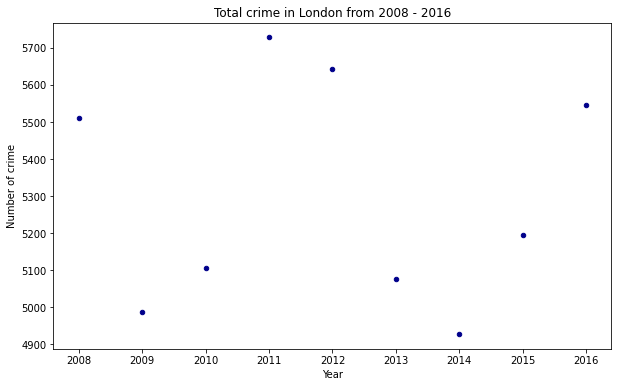

Diketahui dari hasil visualisasi, total crime in london terbesar di tahun 2011 diatas 5700 kasus


In [ ]:
crime_total.plot(kind='scatter', x='year', y='value', figsize=(10, 6), color='darkblue')

plt.title('Total crime in London from 2008 - 2016')
plt.xlabel('Year')
plt.ylabel('Number of crime')

plt.show()

print(f'Diketahui dari hasil visualisasi, total crime in london terbesar di tahun 2011 diatas 5700 kasus')